In [58]:
from collections import OrderedDict
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron, SGDRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from statistics import mean
from sklearn.svm import SVR

from keras.models import Sequential
from keras.layers import Dense

C:\Users\Asus\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# SENTENCES

In [1]:
import numpy as np
import pandas as pd

In [2]:
sentence_db = pd.read_csv("sentence_db.csv", sep = ",", header=None)
sentence_db.head()

,0,1,2,3,4,5,6,7
0,0.000000,0.000000,0.000000,0.000000,0.0,0.213510,2.428571,0.0
1,0.000000,0.000000,0.024805,0.024805,0.0,0.000000,2.775000,0.0
2,0.000000,0.066667,0.000000,0.000000,0.0,0.000000,2.500000,1.0
3,0.076923,0.000000,0.000000,0.000000,0.0,0.138684,2.000000,1.0
4,0.000000,0.071429,0.000000,0.000000,0.0,0.000000,2.384615,1.0


In [ ]:
list(sentence_db.iloc[0])

In [3]:
sentence_db_arr = np.array([np.array(list(sentence_db.iloc[ind])) for ind in range(len(sentence_db))])

In [4]:
len(sentence_db_arr[:,-1])

55

In [ ]:
words_feat_reg = SGDRegressor(max_iter=100, tol=1e-3)
words_feat_reg.fit(X_train, y_train)
print(words_feat_reg.score(X_test, y_test))

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_sent = sentence_db_arr[:,:-1]
y_sent = sentence_db_arr[:,-1]
#X_train, X_test, y_train, y_test = train_test_split(X_sent, y_sent, test_size=0.15)
pca = PCA(n_components=3)
X_red = pca.fit_transform(X_sent) 
X_train, X_test, y_train, y_test = train_test_split(X_red, y_sent, test_size=0.15)

words_feat_reg = SGDRegressor(max_iter=50, tol=1e-3)
words_feat_reg.fit(X_train, y_train)
y_pred = words_feat_reg.predict(X_test)
#print(y_pred.shape,y_test.shape)
print("SGDRegressor" , r2_score(y_pred, y_test))

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("LinearRegression" , r2_score(y_pred, y_test))

clf = SVR(gamma='scale', C=1000, epsilon=0.01)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print("SVR" , r2_score(y_pred, y_test))
print("SVR score" , clf.score(X_test, y_test))

In [31]:
from sklearn.metrics import roc_auc_score

In [42]:
np.mean([1,2,3])

2.0

In [44]:
import operator

In [50]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
X = sentence_db_arr[:,:-1]
y = sentence_db_arr[:,-1]
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4)
results_dic = {}
for i in range(1000):
    if  i % 10 == 0: print (i, "operation")
    for name, clf in zip(names, classifiers):
            #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            y_pred = clf.predict(X_test)
            if name not in results_dic:
                results_dic[name] = []
                results_dic[name].append(score)
            else:
                results_dic[name].append(score)
            #print(name, score)
            #print()
results_dic_mean = {}
for k in results_dic.keys():
    results_dic_mean[k] = np.mean(results_dic[k])
sorted_x = sorted(results_dic_mean.items(), key=operator.itemgetter(1), reverse = True)
sorted_x

0 operation
10 operation
20 operation
30 operation
40 operation
50 operation
60 operation
70 operation
80 operation
90 operation
100 operation
110 operation
120 operation
130 operation
140 operation


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


150 operation
160 operation
170 operation
180 operation
190 operation
200 operation
210 operation
220 operation
230 operation
240 operation
250 operation
260 operation
270 operation
280 operation
290 operation
300 operation
310 operation
320 operation
330 operation
340 operation


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


350 operation
360 operation
370 operation
380 operation
390 operation
400 operation
410 operation
420 operation
430 operation
440 operation
450 operation
460 operation
470 operation
480 operation
490 operation
500 operation
510 operation
520 operation
530 operation
540 operation
550 operation
560 operation
570 operation
580 operation
590 operation
600 operation
610 operation
620 operation
630 operation
640 operation
650 operation
660 operation


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


670 operation
680 operation
690 operation
700 operation
710 operation
720 operation
730 operation
740 operation
750 operation
760 operation
770 operation
780 operation
790 operation
800 operation
810 operation
820 operation
830 operation
840 operation
850 operation
860 operation
870 operation
880 operation
890 operation
900 operation
910 operation
920 operation
930 operation
940 operation
950 operation
960 operation
970 operation
980 operation
990 operation


[('Decision Tree', 0.6652727272727273),
 ('QDA', 0.6363636363636365),
 ('Neural Net', 0.6296363636363638),
 ('Linear SVM', 0.5909090909090909),
 ('RBF SVM', 0.5909090909090909),
 ('Gaussian Process', 0.5909090909090909),
 ('Naive Bayes', 0.5909090909090909),
 ('Random Forest', 0.5816363636363636),
 ('Nearest Neighbors', 0.45454545454545436),
 ('AdaBoost', 0.4090909090909091)]

In [33]:
y_test

array([0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1.])

ValueError: query data dimension must match training data dimension

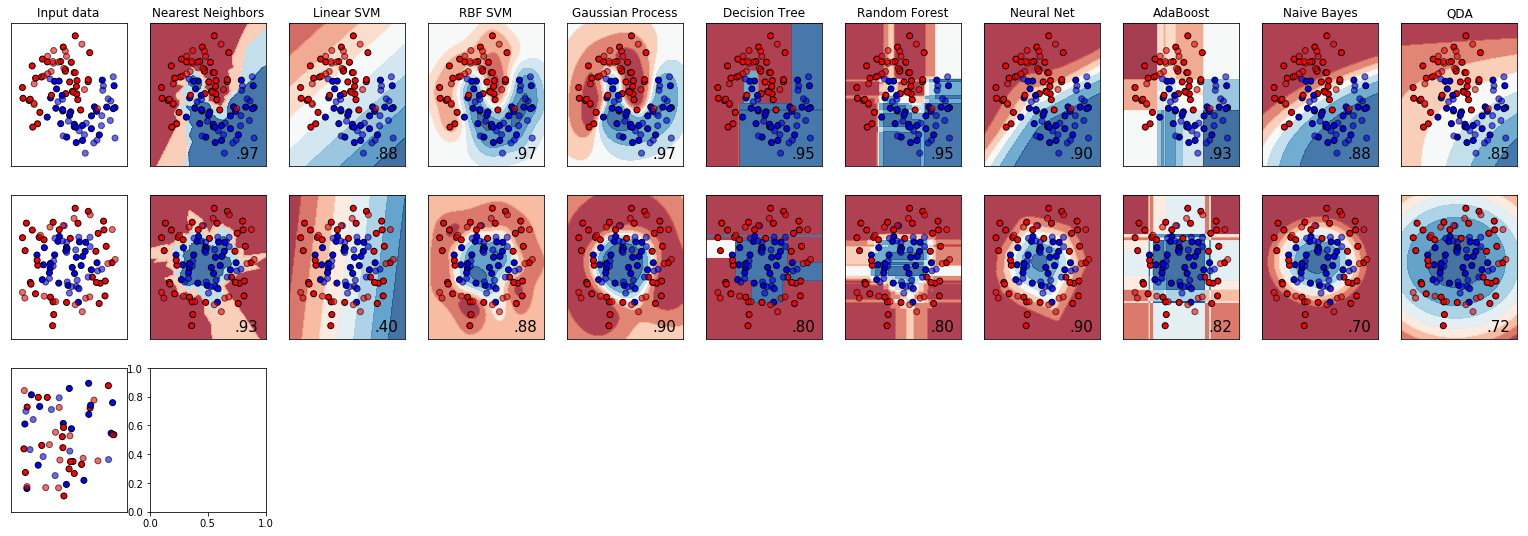

In [8]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X = sentence_db_arr[:,:-1]
y = sentence_db_arr[:,-1]


rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = clf.predict_proba(np.c_[xx.ravel().re, yy.ravel()])[:, 1]
            except:
                Z = clf.predict_proba(np.c_[xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show();

# WORDS

In [51]:
words_db = pd.read_csv("word_db.csv", sep = ",", header=None)
words_db.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.017145,-0.003184,0.021193,0.012507,-0.010270,-0.052294,-0.001633,-0.005375,-0.000764,0.006671,...,0.011895,-0.027713,0.051561,0.008331,0.032934,-0.024888,0.001105,0.007102,-0.024351,-0.062423
1,0.026886,-0.004931,0.008805,0.046496,-0.020424,-0.040810,0.022885,-0.043158,-0.003286,0.021559,...,0.017599,-0.055912,0.113302,0.027441,0.050244,-0.008292,-0.031960,-0.019401,-0.036790,-0.062423
2,0.025138,0.018283,0.002256,0.056073,-0.005190,-0.009589,0.034116,-0.082759,0.010386,-0.009024,...,-0.024053,-0.058979,0.113920,0.052063,0.080001,-0.031828,-0.051977,-0.058209,-0.011824,-0.062423
3,0.029405,0.040867,-0.024990,0.049214,-0.009354,-0.012542,0.067268,-0.131825,0.009027,0.002817,...,-0.052974,0.002787,0.120487,0.077769,0.040742,-0.002568,-0.058726,-0.080010,0.011471,-0.062423
4,0.028029,0.050445,-0.033430,0.045640,-0.042444,-0.004789,0.045307,-0.092097,0.009124,0.002697,...,-0.050791,0.026597,0.060492,0.090770,0.037931,0.009047,-0.043389,-0.054380,0.060023,-0.062423


In [ ]:

#X_train, X_test, y_train, y_test = train_test_split(X_train, y_sent, test_size=0.15)

In [71]:
from sklearn.svm import SVR
from sklearn import svm

In [63]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1]) 

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [75]:


words_db_arr = np.array([np.array(list(words_db.iloc[ind])) for ind in range(len(words_db))])
X_word = words_db_arr[:,:-1]
y_word = words_db_arr[:,-1]

#pca = PCA(n_components=250)
#X_red = pca.fit_transform(X_word) 

X_train, X_test, y_train, y_test = train_test_split(X_word, y_word, test_size=0.15)

words_feat_reg = SGDRegressor(max_iter=50, tol=1e-3)
words_feat_reg.fit(X_train, y_train)
y_pred = words_feat_reg.predict(X_test)
#print(y_pred.shape,y_test.shape)
print("SGDRegressor" , r2_score(y_pred, y_test))

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("LinearRegression" , r2_score(y_pred, y_test))
print("LinearRegression score" , regr.score(X_test, y_test))

clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print("SVR" , r2_score(y_pred, y_test))
print("SVR score" , clf.score(X_test, y_test))

reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Ridge r2_score" , r2_score(y_pred, y_test))
print("Ridge score" , regr.score(X_test, y_test))

reg = svm.SVR(kernel = "rbf")
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("SVR r2_score" , r2_score(y_pred, y_test))
print("SVR score" , regr.score(X_test, y_test))

SGDRegressor -351.5038446323121
LinearRegression 0.24128822232054048
LinearRegression score 0.34491252100073766
SVR 0.0
SVR score -0.3508589862338587
Ridge r2_score -2.2412526680038023
Ridge score 0.34491252100073766
SVR r2_score -421.2884691668016
SVR score 0.34491252100073766


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
clf = svm.SVR()
clf.fit(X, y) 

In [55]:
X.shape

(1070, 300)

In [56]:
# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD 3 clause


import time

import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

rng = np.random.RandomState(0)

# #############################################################################
# Generate sample data

words_db_arr = np.array([np.array(list(words_db.iloc[ind])) for ind in range(len(words_db))])
X = words_db_arr[:,:-1]
y = words_db_arr[:,-1]

# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

X_plot = np.linspace(0, 300, 5)[:, None]

# #############################################################################
# Fit regression model
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(X[:train_size], y[:train_size])
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)

sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(X_plot)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], kr_predict))


# #############################################################################
# Look at the results
sv_ind = svr.best_estimator_.support_
plt.scatter(X[sv_ind], y[sv_ind], c='r', s=50, label='SVR support vectors',
            zorder=2, edgecolors=(0, 0, 0))
plt.scatter(X[:100], y[:100], c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(X_plot, y_svr, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.plot(X_plot, y_kr, c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

# Generate sample data
X = words_db_arr[:,:-1]
y = words_db_arr[:,-1]

y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
sizes = np.logspace(1, 4, 7).astype(np.int)
for name, estimator in {"KRR": KernelRidge(kernel='rbf', alpha=0.1,
                                           gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:train_test_size], y[:train_test_size])
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)

    plt.plot(sizes, train_time, 'o-', color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")

# Visualize learning curves
plt.figure()

svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(kr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",
         label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g",
         label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show();

SVR complexity and bandwidth selected and model fitted in 0.790 s
KRR complexity and bandwidth selected and model fitted in 0.462 s
Support vector ratio: 0.470


ValueError: X.shape[1] = 1 should be equal to 300, the number of features at training time

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [ ]:
diabetes_y_train

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [ ]:
diabetes_y_pred.shape

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

In [ ]:
diabetes_y_pred 

In [ ]:
regr.score(diabetes_y_test.reshape(-1, 1), diabetes_y_pred.reshape(-1, 1) )

In [ ]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show();

In [83]:
ans = [0.8,0.7,0.9,0.4,0.6,0.5,0.9,0.8,0.4,0.7,0.9,0.3,0.4,.5,.6]

In [87]:
def st_dev(lst):
    diff_sq = []
    for el in lst:
        diff_sq_i = (el - 0.8)**2
        diff_sq.append(diff_sq_i)
    diff_sq_sum = sum(diff_sq)
    print(diff_sq_sum)
    diff_sq_sum /= len(diff_sq)
    print(diff_sq_sum)
    diff_sq_sum = diff_sq_sum**(1/2)
    print(diff_sq_sum)
st_dev(ans)

1.0400000000000003
0.06933333333333334
0.26331223544175336
